In [1]:
# Imports
import numpy as np
from skmultiflow.meta import DynamicWeightedMajority
from skmultiflow.data.file_stream import FileStream

val_actual_class_labels=[] #Valence Acutal class labels

val_predicted_class_labels=[] #Valence Predicted Class labels

aro_actual_class_labels =[] #Arousal Acutal class labels

aro_predicted_class_labels=[] #Arousal Predicted Class labels

#===================================================
# Valence Classification From EEG Stream
#===================================================

stream = FileStream('2021_Valence_Class_emo.csv')
stream.prepare_for_use()

# Setup Hoeffding Tree estimator
ht = DynamicWeightedMajority()

# Setup variables to control loop and track performance
n_samples = 0
correct_cnt = 0
max_samples = 1280

val_act_prdt_class_labels =[]


# Train the estimator with the samples provided by the data stream
while n_samples < max_samples and stream.has_more_samples():
    X, y = stream.next_sample()
    
    y_pred = ht.predict(X) 
    
    val_actual_class_labels.append(y)
    val_predicted_class_labels.append(y_pred)
    
    val_act_prdt_class_labels.append([y,y_pred])
    
    if y[0] == y_pred[0]:
        correct_cnt += 1
    ht = ht.partial_fit(X, y)
    n_samples += 1
    
    
# # Display results
print('{} valence samples analyzed.'.format(n_samples))

#===================================================
# Valence Classification From EEG Stream
#===================================================

stream = FileStream('2021_Arousal_Class_emo.csv')
stream.prepare_for_use()

# Setup Hoeffding Tree estimator
ht = DynamicWeightedMajority()

# Setup variables to control loop and track performance
n_samples = 0
correct_cnt = 0
max_samples = 1280

aro_act_prdt_class_labels =[]


# Train the estimator with the samples provided by the data stream
while n_samples < max_samples and stream.has_more_samples():
    X, y = stream.next_sample()
    
    y_pred = ht.predict(X)
    
    aro_actual_class_labels.append(y)
    aro_predicted_class_labels.append(y_pred)
    
    aro_act_prdt_class_labels.append([y,y_pred])
    
    if y[0] == y_pred[0]:
        correct_cnt += 1
    ht = ht.partial_fit(X, y)
    n_samples += 1
    
    
# # Display results
print('{} arousal samples analyzed.'.format(n_samples))


1280 valence samples analyzed.
1280 arousal samples analyzed.


In [2]:
#Reshaping 3D array to 2D array
#================================
#  Valence
#================================
val_act = np.array(val_act_prdt_class_labels)
a,b,c = val_act.shape

newList_val = val_act.reshape(a,-1)


#================================
# Arousal
#================================

aro_act = np.array(aro_act_prdt_class_labels)
a,b,c = aro_act.shape

newList_aro = aro_act.reshape(a,-1)


In [3]:
classifier = 'Dynamic Weighted Majority'
fname_val = '12_JAN_2020_Valence_ALL_person'+'_' +classifier+'_results.csv'
np.savetxt(fname_val,newList_val, delimiter ="\t", fmt =['%d', '%d'], 
        header='y_act_discrete_emotion, y_pred_discrete_emotion')


fname_val = '12_JAN_2020_Arousal_ALL_person'+'_' +classifier+'_results.csv'
np.savetxt(fname_val,newList_aro, delimiter ="\t", fmt =['%d', '%d'], 
        header='y_act_discrete_emotion, y_pred_discrete_emotion')

Confiusion matric
[[149 423]
 [ 97 611]]
Classification Report
              precision    recall  f1-score   support

         Low       0.61      0.26      0.36       572
        High       0.59      0.86      0.70       708

    accuracy                           0.59      1280
   macro avg       0.60      0.56      0.53      1280
weighted avg       0.60      0.59      0.55      1280



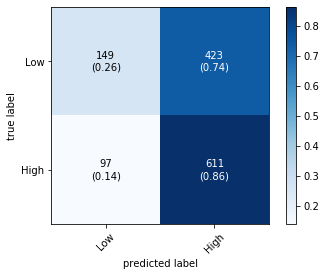

In [4]:
#============================================
# Valence Classification Report
#============================================
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report

y_true = val_actual_class_labels #Acutal class labels

y_pred = val_predicted_class_labels #Predicted Class labels

cm = confusion_matrix(y_true, y_pred) # Confusion Matrix

target_names = ['Low','High'] # Class names

c_report = classification_report(y_true, y_pred, target_names=target_names) #Classification report

acc_score = balanced_accuracy_score(y_true, y_pred) #Balanced accuracy Score calculation


print('Confiusion matric')
print(cm)

# print('Accuracy score', acc_score)

print('Classification Report')
print(c_report)

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

class_names = target_names

## Plot Confusion matric Valence 
## ================================
fig1, ax1 = plot_confusion_matrix(conf_mat=cm, show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                  class_names=class_names)
plt.figure(1)
# plt.show()

fname = 'Dynamic Weighted Majority valence.jpeg'

plt.savefig(fname, bbox_inches='tight')

Confiusion matric
[[205 338]
 [179 558]]
Classification Report
              precision    recall  f1-score   support

         Low       0.53      0.38      0.44       543
        High       0.62      0.76      0.68       737

    accuracy                           0.60      1280
   macro avg       0.58      0.57      0.56      1280
weighted avg       0.59      0.60      0.58      1280



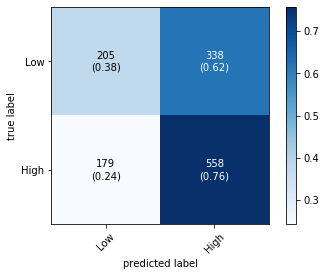

In [5]:
#============================================
# arousal Classification Report
#============================================
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report

y_true = aro_actual_class_labels #Acutal class labels

y_pred = aro_predicted_class_labels #Predicted Class labels

cm = confusion_matrix(y_true, y_pred) # Confusion Matrix

target_names = ['Low','High'] # Class names

c_report = classification_report(y_true, y_pred, target_names=target_names) #Classification report

acc_score = balanced_accuracy_score(y_true, y_pred) #Balanced accuracy Score calculation


print('Confiusion matric')
print(cm)

# print('Accuracy score', acc_score)

print('Classification Report')
print(c_report)

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

class_names = target_names
## Plot Confusion matric Valence 
## ================================
fig1, ax1 = plot_confusion_matrix(conf_mat=cm, show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                  class_names=class_names)
plt.figure(1)
# plt.show()

fname = 'Dynamic Weighted Majority arousal.jpeg'

plt.savefig(fname, bbox_inches='tight')